<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком.

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

In [ ]:
# импорт все необходимых библиотек
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from tqdm import tqdm
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix, recall_score, precision_score, f1_score
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler

In [ ]:
data=pd.read_csv("/datasets/Churn.csv")

ознакомимся с данными

In [ ]:
data.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


Только в столбце Tenure есть пропуски, посмотрим на них

In [ ]:
data[data.isnull().any(axis=1)]


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
30,31,15589475,Azikiwe,591,Spain,Female,39,NaN,0.00,3,1,0,140469.38,1
48,49,15766205,Yin,550,Germany,Male,38,NaN,103391.38,1,0,1,90878.13,0
51,52,15768193,Trevisani,585,Germany,Male,36,NaN,146050.97,2,0,0,86424.57,0
53,54,15702298,Parkhill,655,Germany,Male,41,NaN,125561.97,1,0,0,164040.94,1
60,61,15651280,Hunter,742,Germany,Male,35,NaN,136857.00,1,0,0,84509.57,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9944,9945,15703923,Cameron,744,Germany,Male,41,NaN,190409.34,2,1,1,138361.48,0
9956,9957,15707861,Nucci,520,France,Female,46,NaN,85216.61,1,1,0,117369.52,1
9964,9965,15642785,Douglas,479,France,Male,34,NaN,117593.48,2,0,0,113308.29,0
9985,9986,15586914,Nepean,659,France,Male,36,NaN,123841.49,2,1,0,96833.00,0


Так как нет возможности как-то заполнит эти данные, а показатель является выжным для анализа, удалим эти строки из данных

In [ ]:
data=data.dropna()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9091 entries, 0 to 9998
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        9091 non-null   int64  
 1   CustomerId       9091 non-null   int64  
 2   Surname          9091 non-null   object 
 3   CreditScore      9091 non-null   int64  
 4   Geography        9091 non-null   object 
 5   Gender           9091 non-null   object 
 6   Age              9091 non-null   int64  
 7   Tenure           9091 non-null   float64
 8   Balance          9091 non-null   float64
 9   NumOfProducts    9091 non-null   int64  
 10  HasCrCard        9091 non-null   int64  
 11  IsActiveMember   9091 non-null   int64  
 12  EstimatedSalary  9091 non-null   float64
 13  Exited           9091 non-null   int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.0+ MB


In [ ]:
#проверка на наличие дубликатов
data.duplicated().sum()

0

In [ ]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,9091.000000,9.091000e+03,9091.000000,9091.000000,9091.000000,9091.000000,9091.000000,9091.000000,9091.000000,9091.000000,9091.000000
mean,5013.909911,1.569105e+07,650.736553,38.949181,4.997690,76522.740015,1.530195,0.704983,0.515565,100181.214924,0.203938
std,2884.433466,7.161419e+04,96.410471,10.555581,2.894723,62329.528576,0.581003,0.456076,0.499785,57624.755647,0.402946
min,1.000000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,2521.500000,1.562899e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.000000,0.000000,51227.745000,0.000000
50%,5019.000000,1.569106e+07,652.000000,37.000000,5.000000,97318.250000,1.000000,1.000000,1.000000,100240.200000,0.000000
75%,7511.500000,1.575285e+07,717.000000,44.000000,7.000000,127561.890000,2.000000,1.000000,1.000000,149567.210000,0.000000
max,9999.000000,1.581566e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


## Исследование задачи

Проверим датасет на сбалансированность классов в таргете (факт ухода клиента)

In [ ]:
data["Exited"].value_counts()/len(data)

0    0.796062
1    0.203938
Name: Exited, dtype: float64

соотношения 80 на 20, можно говорить о том, что данные несбалансированные

In [ ]:
#посмотрим корреляцию между данными

data.corr()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004289,0.002330,0.000681,-0.007322,-0.005921,0.009078,0.001248,0.009536,-0.004854,-0.014562
CustomerId,0.004289,1.000000,-0.001610,0.010379,-0.021418,-0.007445,0.014604,-0.019891,0.001499,0.010029,-0.007040
CreditScore,0.002330,-0.001610,1.000000,-0.004504,-0.000062,0.002804,0.011090,-0.003937,0.030947,0.005182,-0.023950
Age,0.000681,0.010379,-0.004504,1.000000,-0.013134,0.031481,-0.031877,-0.014129,0.082269,-0.007037,0.283017
Tenure,-0.007322,-0.021418,-0.000062,-0.013134,1.000000,-0.007911,0.011979,0.027232,-0.032178,0.010520,-0.016761
Balance,-0.005921,-0.007445,0.002804,0.031481,-0.007911,1.000000,-0.301858,-0.019055,-0.003285,0.014351,0.117218
NumOfProducts,0.009078,0.014604,0.011090,-0.031877,0.011979,-0.301858,1.000000,0.005805,0.009084,0.013990,-0.050271
HasCrCard,0.001248,-0.019891,-0.003937,-0.014129,0.027232,-0.019055,0.005805,1.000000,-0.008810,-0.006136,-0.005411
IsActiveMember,0.009536,0.001499,0.030947,0.082269,-0.032178,-0.003285,0.009084,-0.008810,1.000000,-0.020049,-0.155062
EstimatedSalary,-0.004854,0.010029,0.005182,-0.007037,0.010520,0.014351,0.013990,-0.006136,-0.020049,1.000000,0.016029


корреляция между признаками невысокая

<b>Обучение модели</b></font>

In [ ]:
#уберем столцы, которые содржат уникальные признаки
data=data.drop(["RowNumber","CustomerId","Surname"], axis=1)

In [ ]:
#Преобразуем категориальный признаки техникой OHE
data=pd.get_dummies(data,drop_first= True)

<br/>
<div class="alert alert-info">
Поправила
</div>

In [ ]:
data.head(5)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0


разобьем исходные данные на три выборки:обучающую (60%), валидационную(20%) и тестовую(20%)

In [ ]:
#сначала разбиваем на две 80% и 20%(тестовая)
data_train, data_test = train_test_split(data, test_size=0.20, random_state=12345,stratify=data['Exited'])

In [ ]:
#теперь разобьем 80%  на обучающую (75% текущий и 60% от исходной) и валидационную
data_train, data_val = train_test_split(data_train, test_size=0.25, random_state=12345, stratify=data_train['Exited'])

In [ ]:
#разделим все выборки на обучающие данные и целевые показатели
features_train = data_train.drop(['Exited'], axis=1)
target_train = data_train['Exited']
features_valid = data_val.drop(['Exited'], axis=1)
target_valid = data_val['Exited']
features_test = data_test.drop(['Exited'], axis=1)
target_test = data_test['Exited']

Будем обучать модель случайный лес
Запустим цикл с обучением модели от 1 до 10 деревьев и выберим с лучшим результатом accuracy

In [ ]:
%%time

best_model = None
best_result = 0
best_est = 0
best_depth = 0
for est in range(10, 51, 10):
    for depth in range (1, 11):
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        model.fit(features_train,target_train) # обучите модель на тренировочной выборке
        pred=model.predict(features_valid)
        result = f1_score(target_valid,pred)
        if result > best_result:
            best_model = model
            best_result = result
            best_est = est
            best_depth = depth

print("F1 наилучшей модели на валидационной выборке:", best_result)
print(best_model)

F1 наилучшей модели на валидационной выборке: 0.5654450261780104
RandomForestClassifier(max_depth=10, n_estimators=40, random_state=12345)
CPU times: user 5.77 s, sys: 30.7 ms, total: 5.8 s
Wall time: 5.8 s


Наилучший результат модель дает, когда в ней 40 деревье и глубина каждого дерева 10, при этом F1 достигает 0.56

проверим модель случайный лес с 40 деревьями и глубиной 10 на тестовой выборке

In [ ]:


model = RandomForestClassifier(max_depth=10, n_estimators=40, random_state=12345)
model.fit(features_train,target_train)
pred=model.predict(features_test)


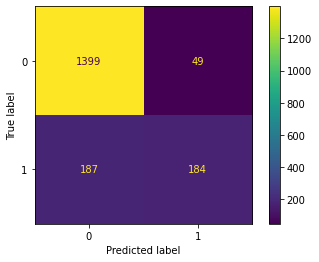

In [ ]:
#посмотрим Матрицу ошибок
cm=confusion_matrix(target_test,pred,labels=model.classes_)
ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_).plot()
plt.show()

видим, что достаточно много ошибочных негативных предсказаний, больше чем инстиных негативных

In [ ]:
#посмотрим на precision и recall
recall=round(recall_score(target_test,pred),4)
precision=round(precision_score(target_test,pred),4)

print("recall", recall)
print("precision", precision)

recall 0.496
precision 0.7897


In [ ]:
#посмотрим на  F1
f1=round(f1_score(target_test,pred),4)
f1

0.6093

Показатель precision достаточно высокий, но низникий показатель recall, что в целом нам дает показатель F1 0,609 это выше целевого (0,59). Но если убрать дизбаланс классов, показатели recall и F1 поднимуться.

## Борьба с дисбалансом

Взвешивание классов.

Обучим две модели Случайный лес  и регрессии, использую взвешивания классов

In [ ]:

%%time

best_model = None
best_result = 0
best_est = 0
best_depth = 0
for est in range(10, 51, 10):
    for depth in range (1, 11):
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth, class_weight='balanced')
        model.fit(features_train,target_train) # обучите модель на тренировочной выборке
        pred=model.predict(features_valid)
        result = f1_score(target_valid,pred)
        if result > best_result:
            best_model = model
            best_result = result
            best_est = est
            best_depth = depth

print("F1 наилучшей модели на валидационной выборке:", best_result)
print(best_model)

F1 наилучшей модели на валидационной выборке: 0.6108247422680413
RandomForestClassifier(class_weight='balanced', max_depth=9, n_estimators=40,
                       random_state=12345)
CPU times: user 5.93 s, sys: 34.5 ms, total: 5.96 s
Wall time: 5.97 s


<br/>
<div class="alert alert-info">
Поправила
</div>

In [ ]:
model = LogisticRegression(random_state=12345, solver='liblinear',class_weight='balanced')
model.fit(features_train, target_train)
pred = model.predict(features_valid)

f1=round(f1_score(target_valid,pred),4)
f1

0.4971

У модели Случайный лес (при 40 деревьев с глубиной 9) показатель F1 на валидационной выборке достаточно высокий 0,61, модель регресси дала более низкий результат 0,49

Увеличение выборки.

Применем другой метод борьбы с дисбалансом - увеличение выборки. Так же применем его к двум моделям

In [ ]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)

    return features_upsampled, target_upsampled



In [ ]:
features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

In [ ]:

%%time

best_model = None
best_result = 0
best_est = 0
best_depth = 0
for est in range(10, 51, 10):
    for depth in range (1, 11):
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        model.fit(features_upsampled,target_upsampled) # обучите модель на тренировочной выборке
        pred=model.predict(features_valid)
        result = f1_score(target_valid,pred)
        if result > best_result:
            best_model = model
            best_result = result
            best_est = est
            best_depth = depth

print("F1 наилучшей модели на валидационной выборке:", best_result)
print(best_model)

F1 наилучшей модели на валидационной выборке: 0.606060606060606
RandomForestClassifier(max_depth=10, n_estimators=50, random_state=12345)
CPU times: user 7.65 s, sys: 31.3 ms, total: 7.68 s
Wall time: 7.68 s


<br/>
<div class="alert alert-info">
Поправила
</div>

In [ ]:
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_upsampled,target_upsampled)
pred = model.predict(features_valid)

f1=round(f1_score(target_valid,pred),4)
f1

0.4934

У модели Случайный лес показатель F1 на валидационной выборке выше, чем у модель регрессии

Уменьшение выборки

In [ ]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])

    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)

    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)

In [ ]:
best_model = None
best_result = 0
best_est = 0
best_depth = 0
for est in range(10, 51, 10):
    for depth in range (1, 11):
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        model.fit(features_downsampled,target_downsampled) # обучите модель на тренировочной выборке
        pred=model.predict(features_valid)
        result = f1_score(target_valid,pred)
        if result > best_result:
            best_model = model
            best_result = result
            best_est = est
            best_depth = depth

print("F1 наилучшей модели на валидационной выборке:", best_result)
print(best_model)

F1 наилучшей модели на валидационной выборке: 0.5841476655808903
RandomForestClassifier(max_depth=8, n_estimators=20, random_state=12345)


In [ ]:
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_downsampled,target_downsampled)
pred = model.predict(features_valid)

f1=round(f1_score(target_valid,pred),4)
f1

0.4878

Изменение порога

Расчитаем F1 для разных порогов в моделях

In [ ]:
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_train, target_train)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

for threshold in np.arange(0, 0.3, 0.02):
    predicted_valid = probabilities_one_valid > threshold
    f1=round(f1_score(target_valid,predicted_valid),4)

    print("Порог = {:.2f} | F1 = {:.3f}".format(
        threshold, f1))

Порог = 0.00 | F1 = 0.339
Порог = 0.02 | F1 = 0.340
Порог = 0.04 | F1 = 0.356
Порог = 0.06 | F1 = 0.377
Порог = 0.08 | F1 = 0.399
Порог = 0.10 | F1 = 0.425
Порог = 0.12 | F1 = 0.438
Порог = 0.14 | F1 = 0.440
Порог = 0.16 | F1 = 0.458
Порог = 0.18 | F1 = 0.471
Порог = 0.20 | F1 = 0.478
Порог = 0.22 | F1 = 0.496
Порог = 0.24 | F1 = 0.490
Порог = 0.26 | F1 = 0.486
Порог = 0.28 | F1 = 0.463


Самый высокое значение F1 (F1 = 0.496) достигается при пороге 0,22

In [ ]:
%%time

best_model = None
best_result = 0
best_est = 0
best_depth = 0
best_threshold=0
for est in range(10, 51, 10):
    for depth in range (1, 11):
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        model.fit(features_train, target_train)
        probabilities_valid = model.predict_proba(features_valid)
        probabilities_one_valid = probabilities_valid[:, 1]
        for threshold in np.arange(0, 0.5, 0.02):
            predicted_valid = probabilities_one_valid > threshold
            result=f1_score(target_valid,predicted_valid)
            if result > best_result:
                best_model = model
                best_result = result
                best_est = est
                best_depth = depth
                best_threshold=threshold

CPU times: user 7.35 s, sys: 35.7 ms, total: 7.39 s
Wall time: 7.41 s


In [ ]:
best_threshold

0.32

In [ ]:
best_result

0.6244725738396625

In [ ]:
best_model

RandomForestClassifier(max_depth=8, n_estimators=50, random_state=12345)

Самый высокое значение F1 (F1 = 0.62) достигается при пороге 0.32 с лесом на 50 деревьев с глубиной 8.

<b>Выводы</b></font>

Мы рассмотрели 4 способа борьбы с дисбалансов на двух моделях. Во всех случаях показатель F1 у модели случайный лес выше, чем у модели регресси. Самый высокий показателья F1 (F1 = 0.62) досигается при применение метода изменение порога классификации с порогом 0,32 с лесом на 50 деревьев с глубиной 8.

## Тестирование модели

Модель для теста - модель случайный лес с 50 деревьями и глубиной 8, с порогом классификации 0,32.

In [ ]:
#Сначала соединим обучающую и валидационную выборку в одну, для более полного обучения


features_train=pd.concat([features_train, features_valid])

target_train=pd.concat([target_train, target_valid])

In [ ]:
model = RandomForestClassifier(max_depth=8, n_estimators=50, random_state=12345)
threshold = 0.32
model.fit(features_train, target_train)
probabilities_test  = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]

predicted_test = probabilities_one_test > threshold  # < напишите код здесь >
f1=round(f1_score(target_test,predicted_test),4)# < напишите код здесь >
f1

0.6301

Показатель F1 равен 0,63, это выше целевого 0,59, цель достигнута

Дополнительно расчитаем показатель AUC-ROC

In [ ]:
auc_roc = roc_auc_score(target_test, probabilities_one_test)
auc_roc

0.8601435570579739

<b>Выводы</b></font>

В ходе проекта мы проанализировали данные о клиентах банка. Нам было необходимо создать модель, для прогноза ухода клиентов из банка.

В данных присутсвовал дизбаланс (80% против 20%). Если с ним ничего не делать, мы получали показатель F1 = 0,609 это выше целевого (0,59). Но если убрать дизбаланс классов, показатели recall и F1 поднимуться


Мы рассмотрели 4 способа борьбы с дисбалансов на двух моделях. Во всех случаях показатель F1 на валидационной выборке у модели случайный лес выше, чем у модели регресси. Самый высокий показателья F1 (F1 = 0.624) досигается при применение метода изменение порога классификации с порогом 0,32.

При применение модели случайный лес с порогом классификации 0,32, мы достигли показателя F1 = 0,63 и AUC-ROC=0.86

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [ ]  Весь код выполняется без ошибок
- [ ]  Ячейки с кодом расположены в порядке исполнения
- [ ]  Выполнен шаг 1: данные подготовлены
- [ ]  Выполнен шаг 2: задача исследована
    - [ ]  Исследован баланс классов
    - [ ]  Изучены модели без учёта дисбаланса
    - [ ]  Написаны выводы по результатам исследования
- [ ]  Выполнен шаг 3: учтён дисбаланс
    - [ ]  Применено несколько способов борьбы с дисбалансом
    - [ ]  Написаны выводы по результатам исследования
- [ ]  Выполнен шаг 4: проведено тестирование
- [ ]  Удалось достичь *F1*-меры не менее 0.59
- [ ]  Исследована метрика *AUC-ROC*